#**REGRESIÓN LOGÍSTICA**
**CLASIFICACIÓN DEL INDICADOR DE CONDICIÓN DE ACTIVIDAD: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA**

**Encuesta Permamente de Empleo del INEI**

---

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# define the dataset location
url1 = '/content/NEW_CSV_Indicador_Condición_Actividad_Moquegua.csv'
#url = '/content/NEW_CSV_Balanceado_Indicador_Condición_Actividad.csv'
# load the csv file as a data frame
df1 = read_csv(url1)

#df = df.drop(0)
#df.reset_index(drop=True, inplace=True)

data1 = df1.values
df1

,p103,p105,p107,p108,p109a,p109b,p201,p202,p203,p2041,...,p209t,p209ee,p213,p218,p220,p222,P224,P225,ingtot,ocu200
0,1,2,1,41,6,5,1,1,0,2,...,35,2,2,0,1,5,9,10,2952,1
1,1,2,1,55,5,3,1,1,0,2,...,38,2,2,0,1,5,9,10,2642,1
2,1,2,1,54,5,2,1,1,0,2,...,27,1,2,0,1,5,9,10,39,1
3,2,2,2,54,5,3,1,1,0,2,...,21,2,2,0,2,5,9,10,0,1
4,3,2,1,15,5,4,1,2,0,2,...,0,2,2,8,2,5,9,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,2,2,1,54,6,5,2,2,2,2,...,0,2,2,3,1,1,7,10,0,3
9247,1,2,1,26,9,3,1,1,0,2,...,40,2,2,0,1,1,7,10,3000,1
9248,2,2,2,27,9,3,1,1,0,2,...,30,2,2,0,1,1,7,10,1100,1
9249,1,2,1,33,6,5,1,1,0,2,...,35,2,2,0,1,9,5,10,2700,1


In [ ]:
X1 = np.array(df1.drop(['ocu200'],1))
y1 = np.array(df1['ocu200'])
X1.shape

<ipython-input-44-549098b99ce1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = np.array(df1.drop(['ocu200'],1))


(9251, 29)

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X1, y1 = oversample.fit_resample(X1, y1)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=5196 (25.000%)
Class=3, n=5196 (25.000%)
Class=1, n=5196 (25.000%)
Class=2, n=5196 (25.000%)


In [ ]:
model1 = linear_model.LogisticRegression()
model1.fit(X1,y1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions1 = model1.predict(X1)
print(predictions1)

[1 1 1 ... 3 4 4]


In [ ]:
model1.score(X1,y1)

0.823518090839107

In [ ]:
validation_size = 0.15
seed = 7
X_train1, X_validation1, Y_train1, Y_validation1 = model_selection.train_test_split(X1, y1, test_size=validation_size, random_state=seed)

In [ ]:
predictions1 = model1.predict(X_validation1)
print(accuracy_score(Y_validation1, predictions1))

0.8152661962796665


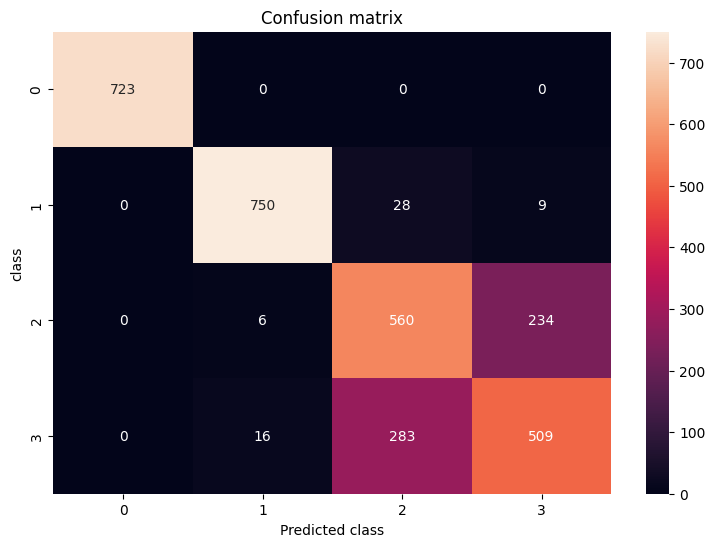

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       723
           2       0.97      0.95      0.96       787
           3       0.64      0.70      0.67       800
           4       0.68      0.63      0.65       808

    accuracy                           0.82      3118
   macro avg       0.82      0.82      0.82      3118
weighted avg       0.82      0.82      0.82      3118



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(Y_validation1, predictions1)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(Y_validation1, predictions1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: ylabel='Feature'>

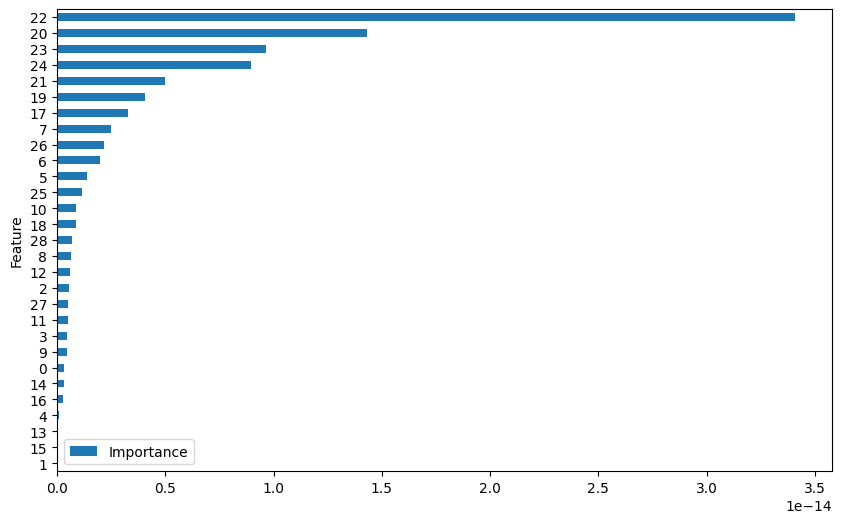

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)

model = LogisticRegression()
model.fit(X_train1, Y_train1)

coefficients = model.coef_

feature_importance = pd.DataFrame({'Feature': range(X_train1.shape[1]), 'Importance': np.abs(coefficients.mean(axis=0))})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


In [ ]:
#persona 8188 [3]

datos1 = pd.DataFrame({
    'p103': [3], 'p105': [2], 'p107': [1], 'p108': [28], 'p109a': [8], 'p109b': [3], 'p201': [2], 'p202': [2], 'p203': [2],
    'p2041': [2], 'p2042': [2], 'p2043': [2], 'p2044': [2], 'p2045': [2], 'p2046': [2], 'p2047': [2], 'p2048': [2],
    'p2049': [1], 'p206': [5], 'P206AA': [5], 'p209t': [12], 'p209ee': [2], 'p213': [2], 'p218': [6],
    'p220': [1], 'p222': [6], 'P224': [6], 'P225': [4], 'ingtot': [0]
})

prediccion = model.predict(datos1)
print(prediccion)

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#**ÁRBOL DE DECISIONES**
**CLASIFICACIÓN DEL INDICADOR DE CONDICIÓN DE ACTIVIDAD: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA**

**Encuesta Permamente de Empleo del INEI**

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
url2 = '/content/NEW_CSV_Indicador_Condición_Actividad_Moquegua.csv'
#url = '/content/NEW_CSV_Balanceado_Indicador_Condición_Actividad.csv'
# load the csv file as a data frame
df2 = read_csv(url2)

#df = df.drop(0)
#df.reset_index(drop=True, inplace=True)

data2 = df2.values
df2

,p103,p105,p107,p108,p109a,p109b,p201,p202,p203,p2041,...,p209t,p209ee,p213,p218,p220,p222,P224,P225,ingtot,ocu200
0,1,2,1,41,6,5,1,1,0,2,...,35,2,2,0,1,5,9,10,2952,1
1,1,2,1,55,5,3,1,1,0,2,...,38,2,2,0,1,5,9,10,2642,1
2,1,2,1,54,5,2,1,1,0,2,...,27,1,2,0,1,5,9,10,39,1
3,2,2,2,54,5,3,1,1,0,2,...,21,2,2,0,2,5,9,10,0,1
4,3,2,1,15,5,4,1,2,0,2,...,0,2,2,8,2,5,9,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,2,2,1,54,6,5,2,2,2,2,...,0,2,2,3,1,1,7,10,0,3
9247,1,2,1,26,9,3,1,1,0,2,...,40,2,2,0,1,1,7,10,3000,1
9248,2,2,2,27,9,3,1,1,0,2,...,30,2,2,0,1,1,7,10,1100,1
9249,1,2,1,33,6,5,1,1,0,2,...,35,2,2,0,1,9,5,10,2700,1


In [ ]:
X2, y2 = data2[:, :-1], data2[:, -1]
print(X2)

[[   1    2    1 ...    9   10 2952]
 [   1    2    1 ...    9   10 2642]
 [   1    2    1 ...    9   10   39]
 ...
 [   2    2    2 ...    7   10 1100]
 [   1    2    1 ...    5   10 2700]
 [   2    2    2 ...    7   10    0]]


In [ ]:
y2 = LabelEncoder().fit_transform(y2)
print(y2)

[0 0 0 ... 0 0 3]


In [ ]:
#balancear
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X2, y2 = oversample.fit_resample(X2, y2)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=5196 (25.000%)
Class=3, n=5196 (25.000%)
Class=1, n=5196 (25.000%)
Class=2, n=5196 (25.000%)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Inicializar el clasificador de árboles de decisión
clf2 = DecisionTreeClassifier()

# Entrenar el modelo
clf2.fit(X_train2, y_train2)

# Realizar predicciones en el conjunto de prueba
y_pred2 = clf2.predict(X_test2)

# Evaluar el rendimiento del modelo
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Exactitud del modelo: {accuracy2:.2f}')


Exactitud del modelo: 0.96


In [ ]:
predictions2 = clf2.predict(X2)
print(predictions2)

[0 0 0 ... 3 3 3]


In [ ]:
predictions2 = clf2.predict(X_test2)
print(accuracy_score(y_test2, predictions2))

0.9627134953091172


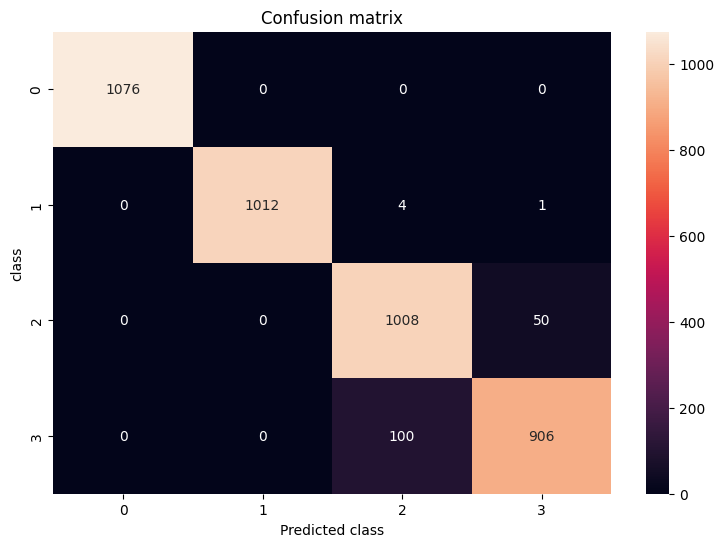

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00      1017
           2       0.91      0.95      0.93      1058
           3       0.95      0.90      0.92      1006

    accuracy                           0.96      4157
   macro avg       0.96      0.96      0.96      4157
weighted avg       0.96      0.96      0.96      4157



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test2, predictions2))

#**SVM (Support Vector Machine)**
**CLASIFICACIÓN DEL INDICADOR DE CONDICIÓN DE ACTIVIDAD: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA**

**Encuesta Permamente de Empleo del INEI**

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
url3 = '/content/NEW_CSV_Indicador_Condición_Actividad_Moquegua.csv'
#url = '/content/NEW_CSV_Balanceado_Indicador_Condición_Actividad.csv'
# load the csv file as a data frame
df3 = read_csv(url3)

#df = df.drop(0)
#df.reset_index(drop=True, inplace=True)

data3 = df3.values
df3

,p103,p105,p107,p108,p109a,p109b,p201,p202,p203,p2041,...,p209t,p209ee,p213,p218,p220,p222,P224,P225,ingtot,ocu200
0,1,2,1,41,6,5,1,1,0,2,...,35,2,2,0,1,5,9,10,2952,1
1,1,2,1,55,5,3,1,1,0,2,...,38,2,2,0,1,5,9,10,2642,1
2,1,2,1,54,5,2,1,1,0,2,...,27,1,2,0,1,5,9,10,39,1
3,2,2,2,54,5,3,1,1,0,2,...,21,2,2,0,2,5,9,10,0,1
4,3,2,1,15,5,4,1,2,0,2,...,0,2,2,8,2,5,9,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,2,2,1,54,6,5,2,2,2,2,...,0,2,2,3,1,1,7,10,0,3
9247,1,2,1,26,9,3,1,1,0,2,...,40,2,2,0,1,1,7,10,3000,1
9248,2,2,2,27,9,3,1,1,0,2,...,30,2,2,0,1,1,7,10,1100,1
9249,1,2,1,33,6,5,1,1,0,2,...,35,2,2,0,1,9,5,10,2700,1


In [ ]:
X3, y3 = data3[:, :-1], data3[:, -1]
print(X3)

[[   1    2    1 ...    9   10 2952]
 [   1    2    1 ...    9   10 2642]
 [   1    2    1 ...    9   10   39]
 ...
 [   2    2    2 ...    7   10 1100]
 [   1    2    1 ...    5   10 2700]
 [   2    2    2 ...    7   10    0]]


In [ ]:
y3 = LabelEncoder().fit_transform(y3)
print(y3)

[0 0 0 ... 0 0 3]


In [ ]:
#balancear
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X3, y3 = oversample.fit_resample(X3, y3)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=5196 (25.000%)
Class=3, n=5196 (25.000%)
Class=1, n=5196 (25.000%)
Class=2, n=5196 (25.000%)


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)

# Inicializar el clasificador SVM
clf3 = SVC()

# Entrenar el modelo
clf3.fit(X_train3, y_train3)

# Realizar predicciones en el conjunto de prueba
y_pred3 = clf3.predict(X_test3)

# Evaluar el rendimiento del modelo
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Exactitud del modelo: {accuracy3:.2f}')

Exactitud del modelo: 0.52


In [ ]:
predictions3 = clf3.predict(X3)
print(predictions3)

[0 0 3 ... 1 3 1]


In [ ]:
predictions3 = clf3.predict(X_test3)
print(accuracy_score(y_test3, predictions3))

0.5171285604311009


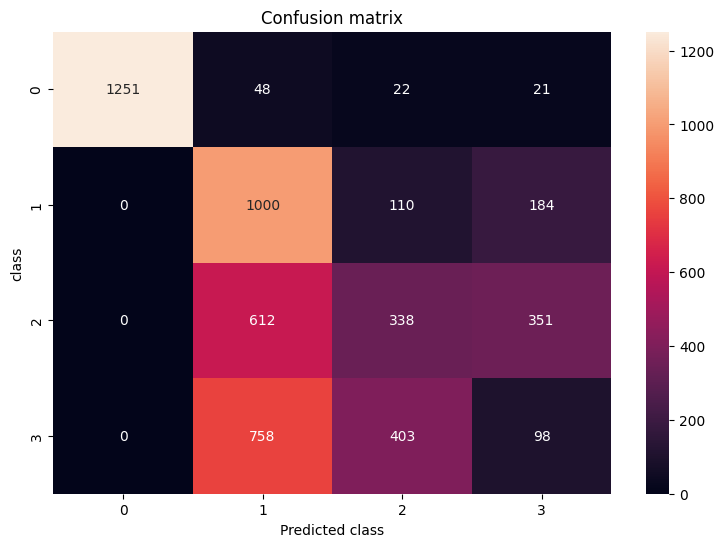

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1342
           1       0.41      0.77      0.54      1294
           2       0.39      0.26      0.31      1301
           3       0.15      0.08      0.10      1259

    accuracy                           0.52      5196
   macro avg       0.49      0.51      0.48      5196
weighted avg       0.49      0.52      0.49      5196



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test3, predictions3)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test3, predictions3))

#**RANDOM FOREST**
**CLASIFICACIÓN DEL INDICADOR DE CONDICIÓN DE ACTIVIDAD: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA**

**Encuesta Permamente de Empleo del INEI**

---

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
# define the dataset location
url = '/content/NEW_CSV_Indicador_Condición_Actividad_Moquegua.csv'
#url = '/content/NEW_CSV_Balanceado_Indicador_Condición_Actividad.csv'
# load the csv file as a data frame
df = read_csv(url)

#df = df.drop(0)
#df.reset_index(drop=True, inplace=True)

data = df.values
df

,p103,p105,p107,p108,p109a,p109b,p201,p202,p203,p2041,...,p209t,p209ee,p213,p218,p220,p222,P224,P225,ingtot,ocu200
0,1,2,1,41,6,5,1,1,0,2,...,35,2,2,0,1,5,9,10,2952,1
1,1,2,1,55,5,3,1,1,0,2,...,38,2,2,0,1,5,9,10,2642,1
2,1,2,1,54,5,2,1,1,0,2,...,27,1,2,0,1,5,9,10,39,1
3,2,2,2,54,5,3,1,1,0,2,...,21,2,2,0,2,5,9,10,0,1
4,3,2,1,15,5,4,1,2,0,2,...,0,2,2,8,2,5,9,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,2,2,1,54,6,5,2,2,2,2,...,0,2,2,3,1,1,7,10,0,3
9247,1,2,1,26,9,3,1,1,0,2,...,40,2,2,0,1,1,7,10,3000,1
9248,2,2,2,27,9,3,1,1,0,2,...,30,2,2,0,1,1,7,10,1100,1
9249,1,2,1,33,6,5,1,1,0,2,...,35,2,2,0,1,9,5,10,2700,1


In [ ]:
print(df.shape)
print(pd.value_counts(df['ocu200'], sort = True))

(9251, 30)
1    5196
4    3081
2     710
3     264
Name: ocu200, dtype: int64


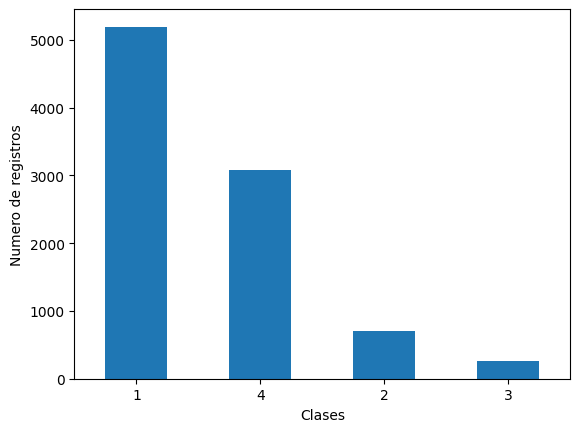

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['ocu200'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(8))
#plt.title("Numero de registros por clase")
plt.xlabel("Clases")
plt.ylabel("Numero de registros");

Class=0, n=5196 (56.167%)
Class=3, n=3081 (33.305%)
Class=1, n=710 (7.675%)
Class=2, n=264 (2.854%)


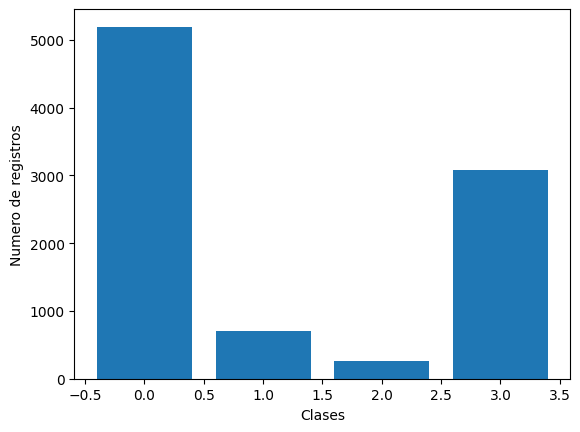

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel("Clases")
pyplot.ylabel("Numero de registros");
pyplot.show()

##**Training**

---

In [ ]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [ ]:
print(X)

[[   1    2    1 ...    9   10 2952]
 [   1    2    1 ...    9   10 2642]
 [   1    2    1 ...    9   10   39]
 ...
 [   2    2    2 ...    7   10 1100]
 [   1    2    1 ...    5   10 2700]
 [   2    2    2 ...    7   10    0]]


In [ ]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)

In [ ]:
print(y)

[0 0 0 ... 0 0 3]


**Pause_balancear**

---

Class=0, n=5196 (25.000%)
Class=3, n=5196 (25.000%)
Class=1, n=5196 (25.000%)
Class=2, n=5196 (25.000%)


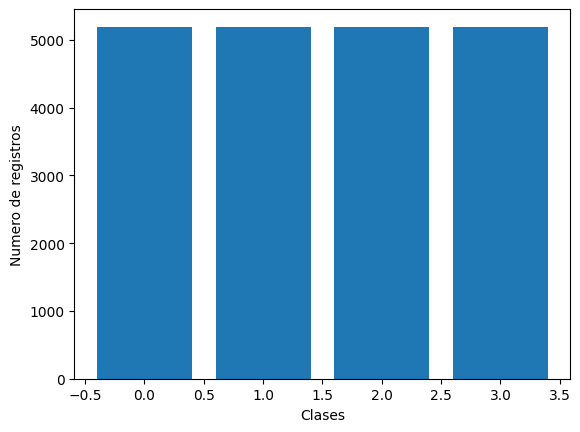

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel("Clases")
pyplot.ylabel("Numero de registros");
pyplot.show()

**Continuar**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#dividimos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#crear y entrenar el Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

#evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

#print
#print('Informe de Clasificación:')
#print(classification_report(y_test, y_pred))


Precisión del modelo: 0.98


In [ ]:
print(y_train)
print(y_train.size)

[2 3 1 ... 3 0 2]
16627


In [ ]:
print(y_test)
print(y_test.size)

[0 1 1 ... 3 1 2]
4157


##**Confusion Matrix**

---

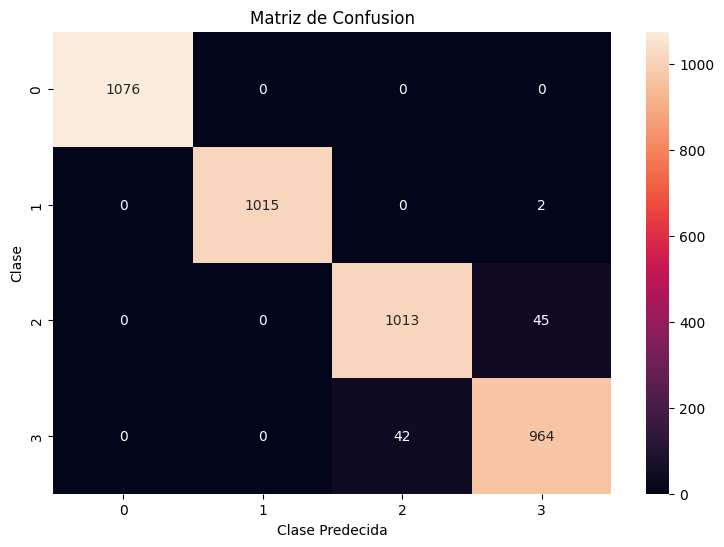

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00      1017
           2       0.96      0.96      0.96      1058
           3       0.95      0.96      0.96      1006

    accuracy                           0.98      4157
   macro avg       0.98      0.98      0.98      4157
weighted avg       0.98      0.98      0.98      4157



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Matriz de Confusion")
plt.ylabel('Clase')
plt.xlabel('Clase Predecida')
plt.show()
print(classification_report(y_test, y_pred))

##**Feature Importance**

---

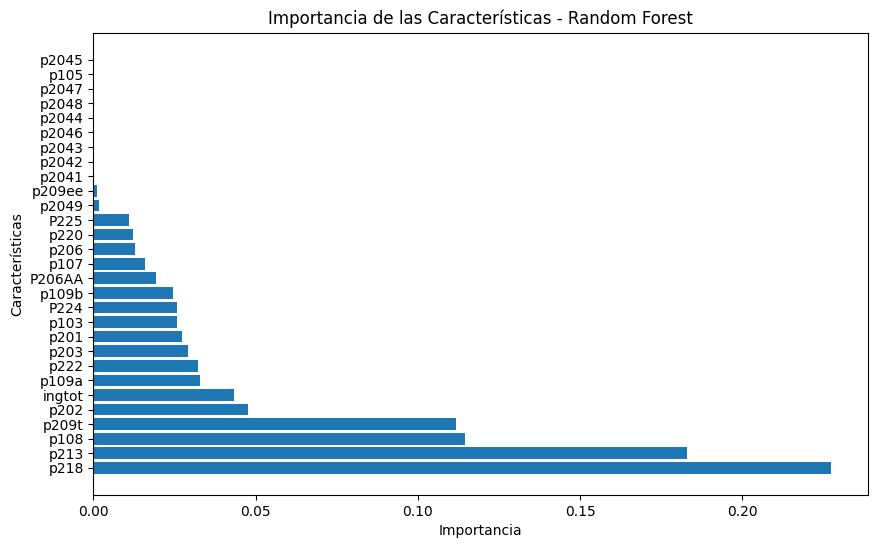

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# importancia de las características
feature_importance = clf.feature_importances_

#names de columnas
feature_names = ["p103", "p105", "p107", "p108", "p109a", "p109b", "p201", "p202", "p203", "p2041",
                 "p2042", "p2043", "p2044", "p2045", "p2046", "p2047", "p2048", "p2049", "p206",
                 "P206AA", "p209t", "p209ee", "p213", "p218", "p220", "p222", "P224",
                 "P225", "ingtot"]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características - Random Forest')
plt.show()

###**Gráfico para indicar si los árboles que se tuvieron que construir fueron suficientes o no**

---

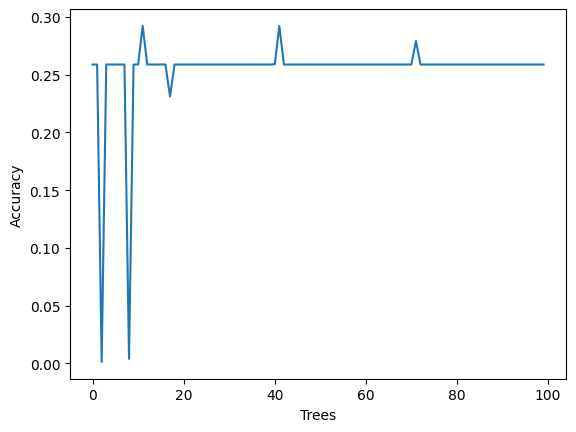

In [ ]:
import sklearn.metrics

trees=range(100)
accuracy=np.zeros(100)

for idx in range(len(trees)):
  classifier=RandomForestClassifier(n_estimators=idx + 1)
  classifier=classifier.fit(X_train,y_train)
  predictions=classifier.predict(X_test)
  accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)

plt.cla()
pyplot.xlabel("Trees")
pyplot.ylabel("Accuracy");
plt.plot(trees, accuracy)

#**Probar Nuevos Datos - RANDOM FOREST**

---


Persona 1: [0]


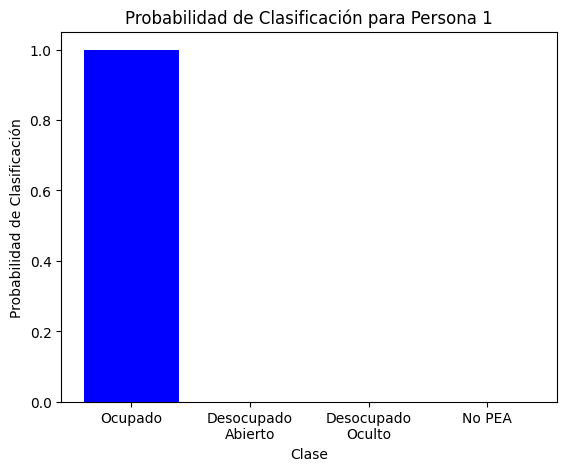


Persona 2: [0]


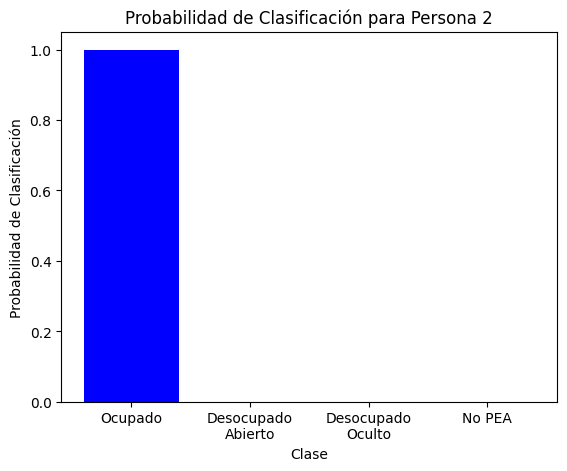


Persona 3: [0]


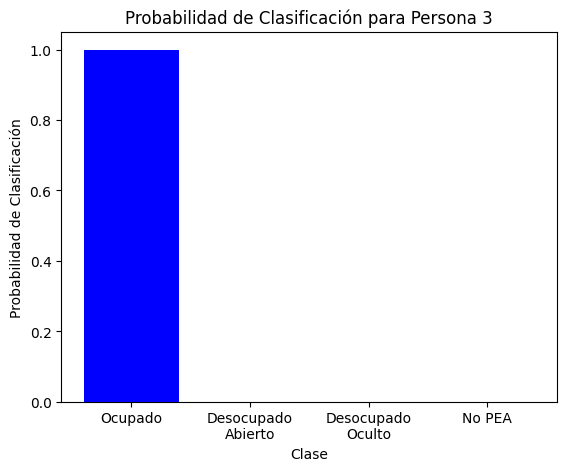


Persona 4: [1]


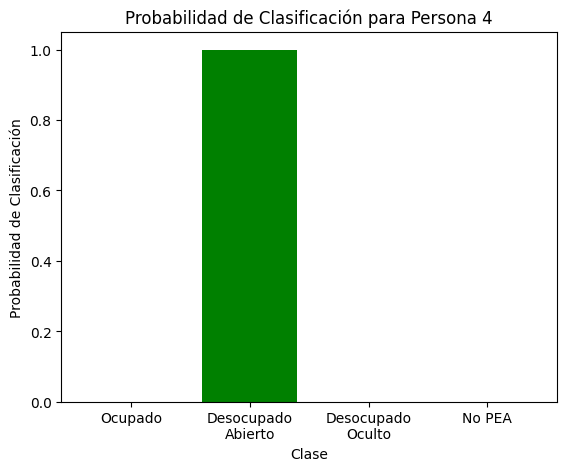


Persona 5: [1]


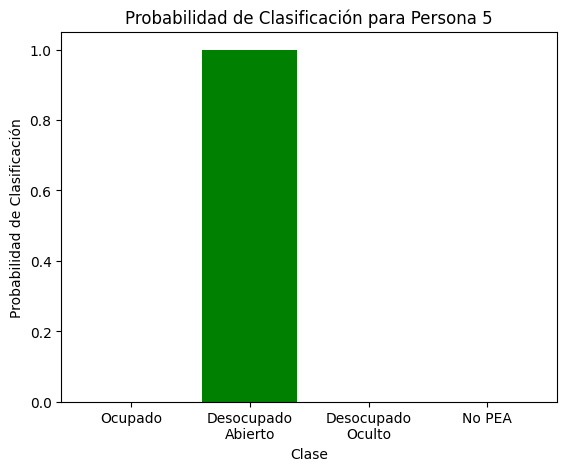


Persona 6: [1]


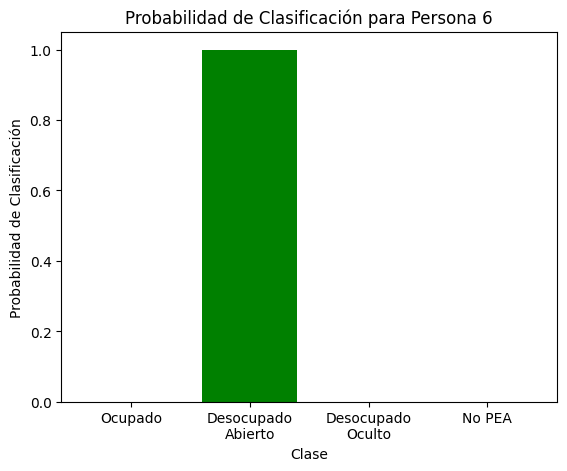


Persona 7: [2]


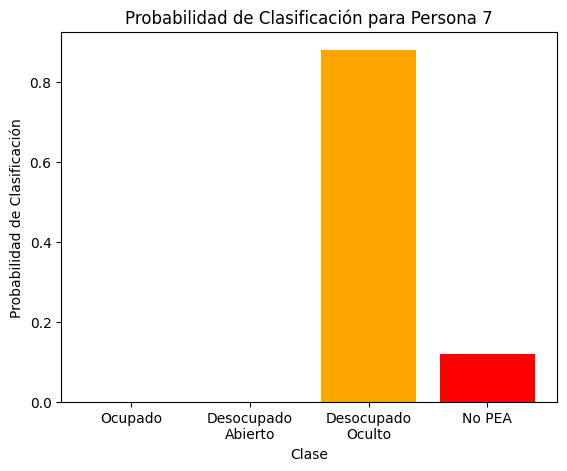


Persona 8: [2]


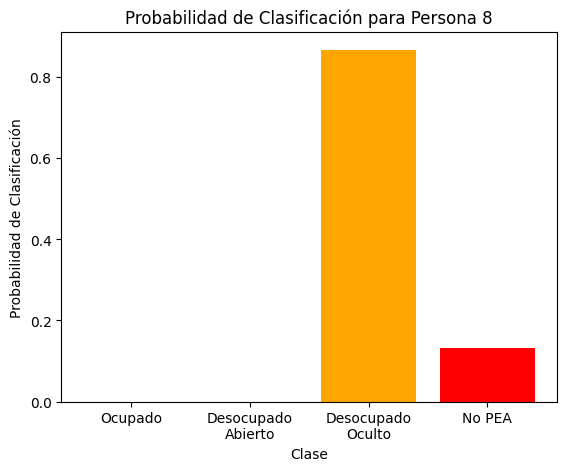


Persona 9: [2]


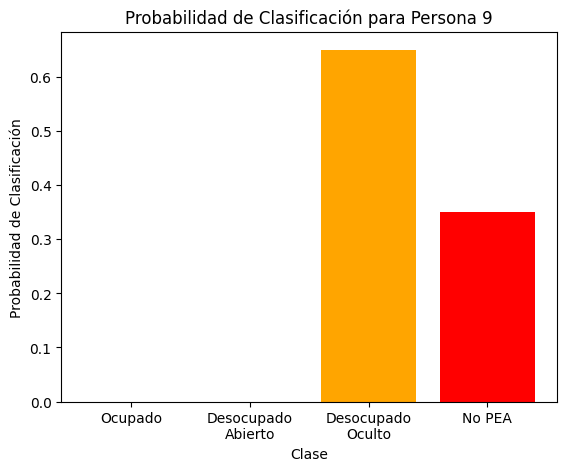


Persona 10: [3]


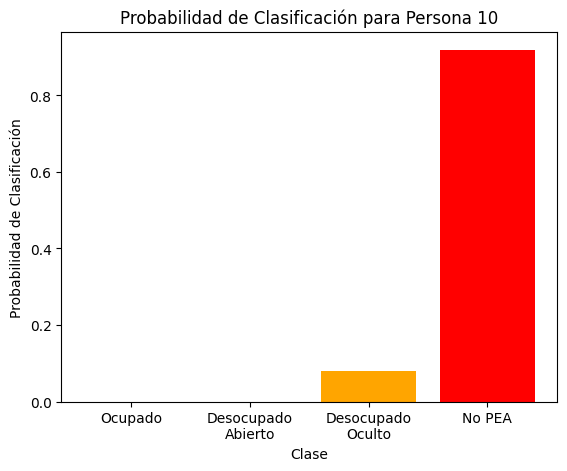


Persona 11: [3]


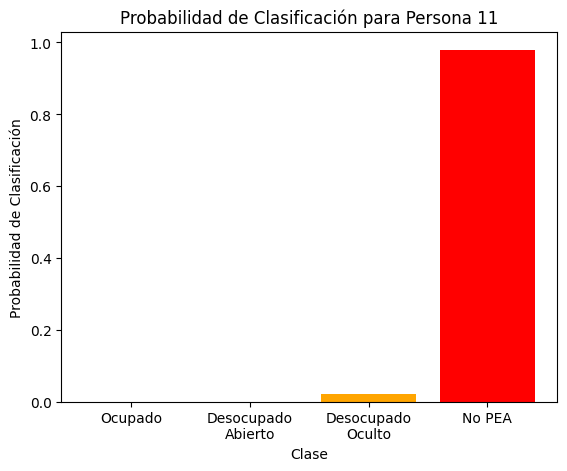


Persona 12: [3]


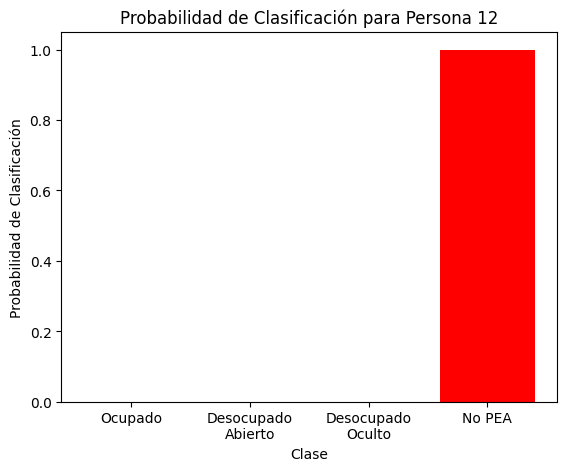


Persona 13: [0]


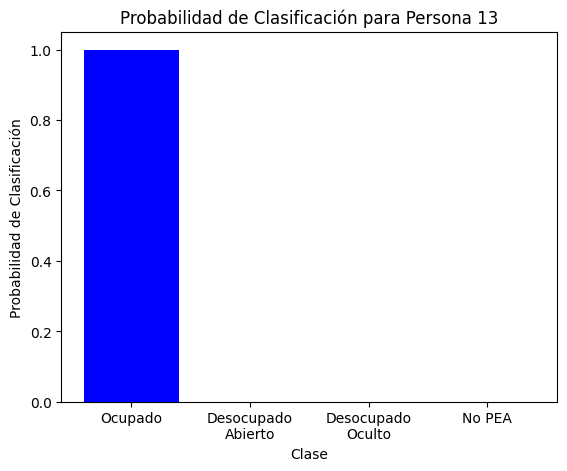

In [ ]:
import numpy as np
#persona 35 [1] (check)
X_new1 = [1,2,2,27,5,2,1,1,0,2,2,2,2,2,2,2,2,2,4,6,34,2,2,0,1,5,7,10,0]
#persona 36 [1] (check)
X_new2 = [1,2,2,65,1,0,1,1,0,2,2,2,2,2,2,2,2,2,2,0,63,2,2,0,2,5,1,1,227]
#persona 39 [1]  (check)
X_new3 = [2,2,2,63,6,5,1,1,0,2,2,2,2,2,2,2,2,2,3,2,40,2,2,0,2,1,7,2,1300]
#persona 83 [2] (check)
X_new4 = [3,2,2,19,10,3,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,1,8,2,5,7,10,0]
#persona 400 [2] (check)
X_new5 = [3,2,1,24,11,5,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,1,8,1,5,7,10,0]
#persona 523 [2] (ckeck)
X_new6 = [1,2,2,66,1,0,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,1,8,1,1,2,2,0]
#persona 593 [3] (ckeck)
X_new7 = [1,2,2,73,3,1,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,2,7,1,5,9,2,0]
#persona 710 [3] (ckeck)
X_new8 = [2,2,2,34,9,3,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,2,5,1,5,7,10,0]
#persona 1188 [3] (ckeck)
X_new9 = [2,2,2,32,6,5,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,2,5,1,9,9,10,0]
#persona 1285 [4] (ckeck)
X_new10 = [6,2,2,61,5,3,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,2,7,1,1,7,10,0]
#persona 1333 [4] (ckeck)
X_new11 = [8,2,1,88,3,3,2,2,2,2,2,2,2,2,2,2,2,2,3,6,0,2,2,7,1,5,9,2,0]
#persona 1473 [4] (ckeck)
X_new12 = [3,2,1,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,5,2,9,7,10,0]
#persona 1385 [1] (ckeck)
X_new13 = [3,2,1,38,9,3,1,1,0,2,2,2,2,2,2,2,2,2,3,3,40,2,2,0,1,9,7,10,1800]
#persona  [] (ckeck)
#X_new14 = [6,2,1,94,3,4,2,2,2,2,2,2,2,2,2,2,2,2,7,6,0,2,2,6,1,5,6,4,0]

columnas = ["p103", "p105", "p107", "p108", "p109a", "p109b", "p201", "p202", "p203", "p2041",
    "p2042", "p2043", "p2044", "p2045", "p2046", "p2047", "p2048", "p2049", "p206",
    "P206AA", "p209t", "p209ee", "p213", "p218", "p220", "p222", "P224", "P225", "ingtot", "ocu200new"]

df_nuevo = pd.DataFrame(columns=columnas)

#personas para predecir
personas = [X_new1, X_new2, X_new3, X_new4, X_new5, X_new6, X_new7, X_new8, X_new9, X_new10, X_new11, X_new12, X_new13]

for i, persona in enumerate(personas, start=1):
    #poner a X_new como un arreglo bidi
    X_new = np.array(persona).reshape(1, -1)
    #predecir os nuevos datos
    y_pred_new = clf.predict(X_new)
    print()
    print(f'Persona {i}: {y_pred_new}')

    #agregamos los resultados a una new data
    df_nuevo.loc[i] = persona + [y_pred_new[0]]

    #grafiquito
    prob_new = clf.predict_proba(X_new)[0]
    plt.bar(range(4), prob_new, color=['blue', 'green', 'orange', 'red'])
    plt.xticks(range(4), ['Ocupado', 'Desocupado\nAbierto', 'Desocupado\nOculto', 'No PEA'])
    plt.xlabel('Clase')
    plt.ylabel('Probabilidad de Clasificación')
    plt.title(f'Probabilidad de Clasificación para Persona {i}')
    plt.show()

#print(df_nuevo)

#**Grafiquitos - RANDOM FOREST**

---

##**Población con Nivel de Empleo: Ocupado, Según Nivel de Educación Alcanzado y Según el Sexo**

---

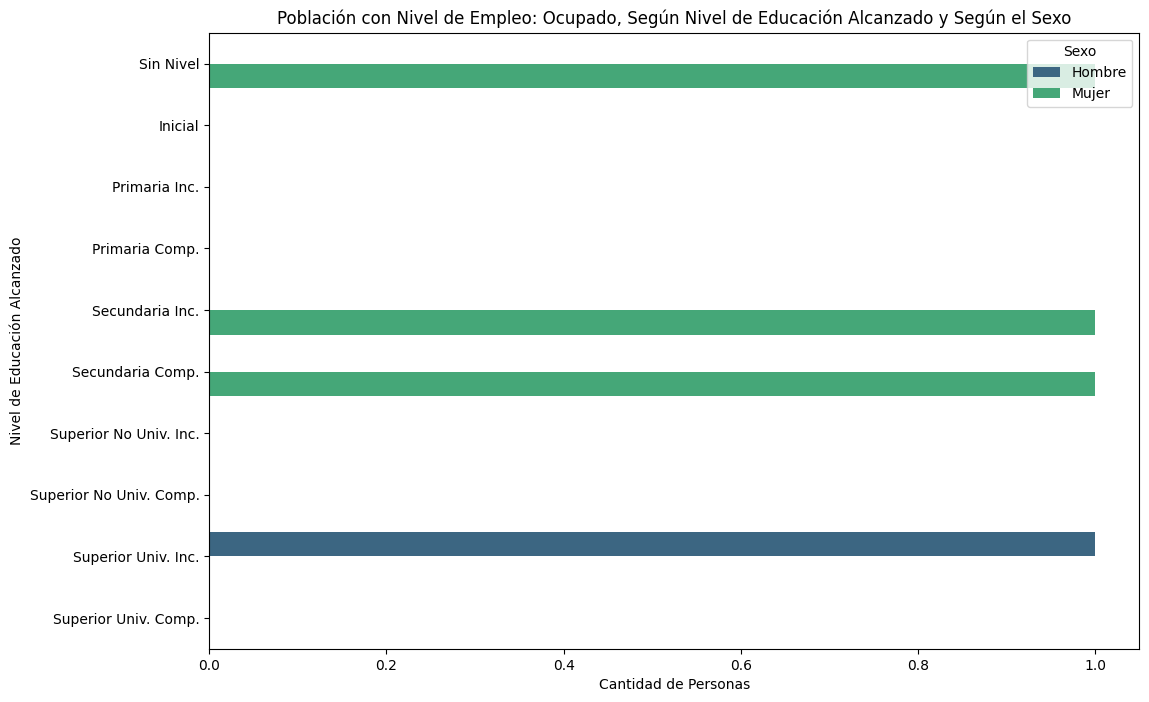

In [ ]:
import seaborn as sns

#personas con nivel de empleo:ocupado
df_activos = df_nuevo[df_nuevo['ocu200new'] == 0]

orden_categorias = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#grafiquito para cada nivel de educación y sexo
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='p109a', hue='p107', data=df_activos, order=orden_categorias, palette='viridis')

legend_labels = ['Sin Nivel', 'Inicial', 'Primaria Inc.', 'Primaria Comp.',
                 'Secundaria Inc.', 'Secundaria Comp.',
                 'Superior No Univ. Inc.', 'Superior No Univ. Comp.',
                 'Superior Univ. Inc.', 'Superior Univ. Comp.']
ax.set_yticklabels(legend_labels)

legend_labels1 = ['Hombre', 'Mujer']
ax.legend(title='Sexo', labels=legend_labels1)

plt.xlabel('Cantidad de Personas')
plt.ylabel('Nivel de Educación Alcanzado')
plt.title('Población con Nivel de Empleo: Ocupado, Según Nivel de Educación Alcanzado y Según el Sexo')
plt.show()

##**Población con Nivel de Empleo: Ocupado, Según Edad y Según el Sexo**

---

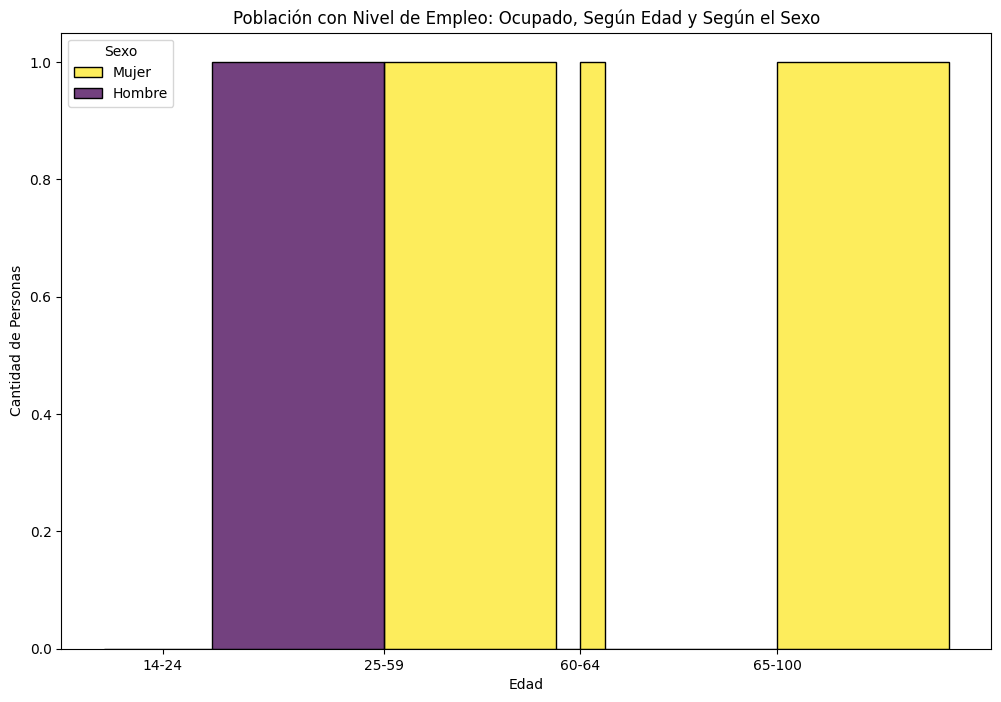

In [ ]:
import seaborn as sns

bins = [14, 25, 60, 65, 100]

df_activos2 = df_nuevo[df_nuevo['ocu200new'] == 0]

plt.figure(figsize=(12, 8))
ax = sns.histplot(x='p108', hue='p107', data=df_activos2, bins=bins, multiple='dodge', palette='viridis')

interval_labels = ['14-24', '25-59', '60-64', '65-100']
plt.xticks([20, 42.5, 62.5, 82.5], interval_labels)

#legend_labels1 = ['Hombre', 'Mujer']
legend_labels1 = ['Mujer', 'Hombre']
ax.legend(title='Sexo', labels=legend_labels1)

plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.title('Población con Nivel de Empleo: Ocupado, Según Edad y Según el Sexo')
plt.show()

##**Población con Nivel de Empleo: Ocupado, Según Tipo de Seguro de Salud**

---

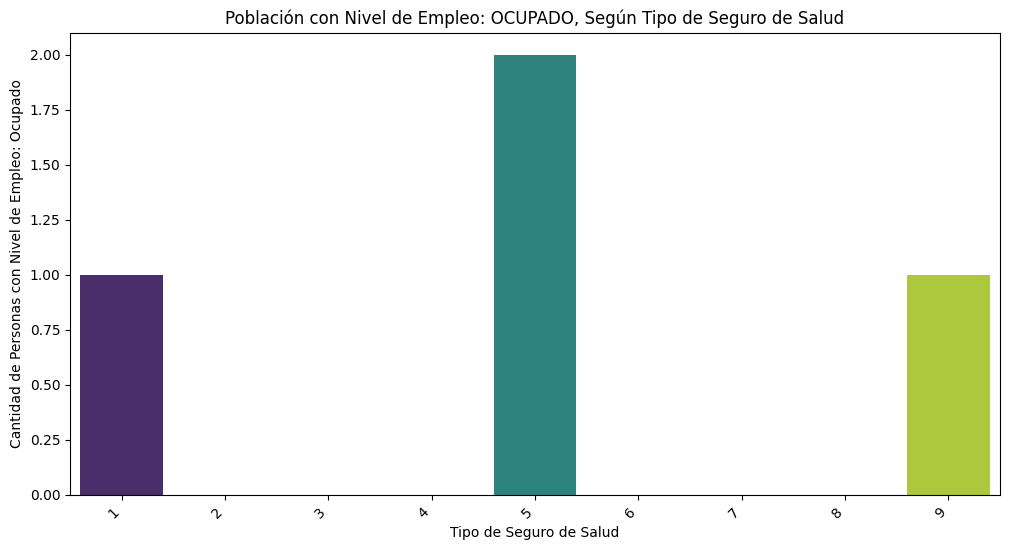

In [ ]:
import seaborn as sns

df_ocupados3 = df_nuevo[df_nuevo['ocu200new'] == 0]

etiquetas_p222 = {
    1: 1, #ESSALUD (antes IPSS)
    2: 2, #SEGURO PRIVADO DE SALUD
    3: 3, #ENTIDAD PRESTADORA DE SALUD
    4: 4, #SEGURO DE FF.AA./POLICIALES
    5: 5,  #SEGURO UNIVERSAL DE SALUD (SIS)
    6: 6,  #SEGURO UNIVERSITARIO
    7: 7,  #SEGURO ESCOLAR PRIVADO
    8: 8,  #OTRO
    9: 9  #NO TIENE SEGURO
}

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='p222', data=df_ocupados3, order=etiquetas_p222.values(), palette='viridis')

plt.xlabel('Tipo de Seguro de Salud')
plt.ylabel('Cantidad de Personas con Nivel de Empleo: Ocupado')
plt.title('Población con Nivel de Empleo: OCUPADO, Según Tipo de Seguro de Salud')

ax.set_xticklabels(etiquetas_p222.values(), rotation=45, ha='right')
plt.show()


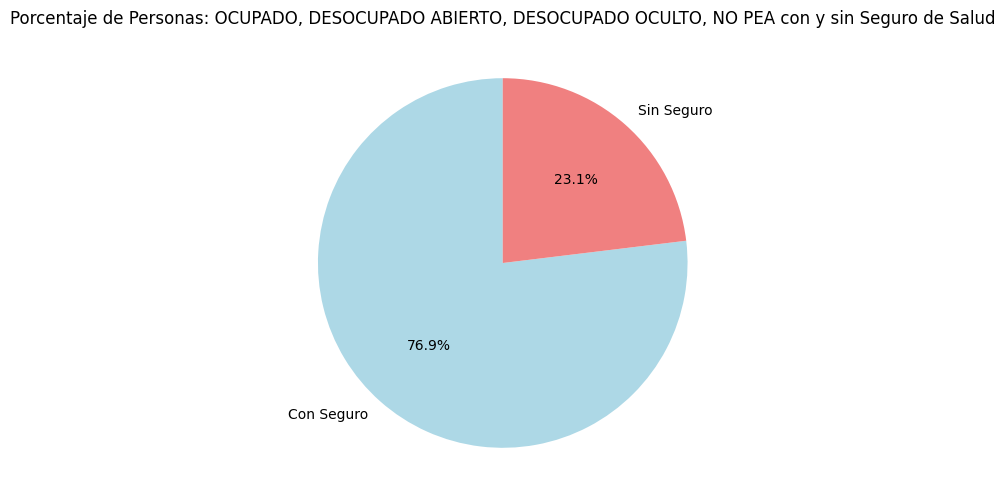

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las personas ocupadas (ocu200new=0)
#df_ocupados4 = df_nuevo[df_nuevo['ocu200new'] == 0]

# Contar la cantidad de personas con seguro y sin seguro
conteo_con_seguro = df_nuevo['p222'].isin([1, 2, 3, 4, 5, 6, 7, 8]).sum()
conteo_sin_seguro = len(df_nuevo) - conteo_con_seguro

# Etiquetas y valores para el gráfico de torta
etiquetas = ['Con Seguro', 'Sin Seguro']
valores = [conteo_con_seguro, conteo_sin_seguro]

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Porcentaje de Personas: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA con y sin Seguro de Salud')
plt.show()

##**INGRESO PROMEDIO PROVENIENTE DEL TRABAJO DE PERSONAS OCUPADAS SEGÚN SEXO Y GRUPOS DE EDAD**

---

<ipython-input-21-b2ca1841bf18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocupados['intervalo_edad'] = pd.cut(df_ocupados['p108'], bins=bins, labels=['14-24 años', '25-44 años', '45 años a más'])


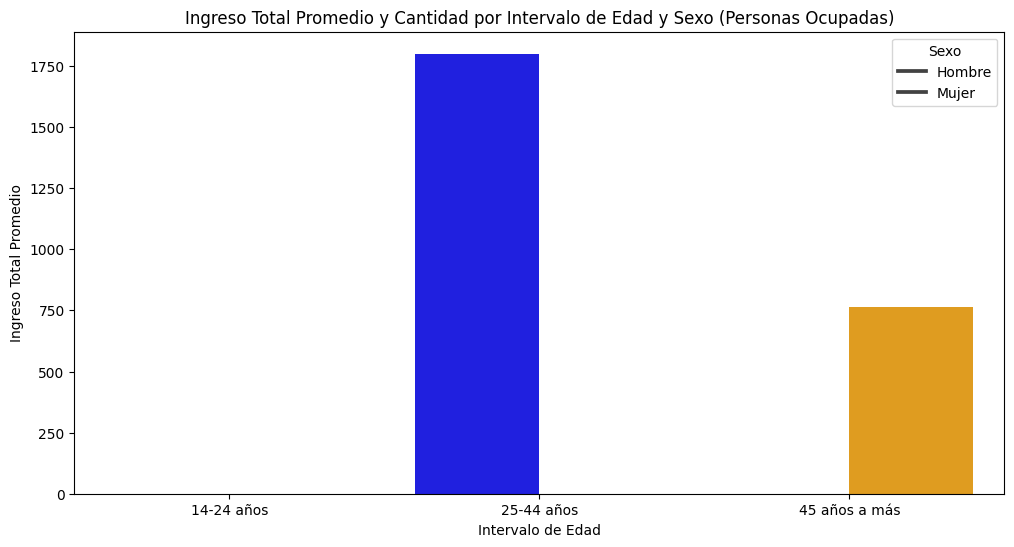

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#interv edades
bins = [14, 25, 45, 100]

df_ocupados = df_nuevo[df_nuevo['ocu200new'] == 0]

#new colum intervalos edades
df_ocupados['intervalo_edad'] = pd.cut(df_ocupados['p108'], bins=bins, labels=['14-24 años', '25-44 años', '45 años a más'])

#ingreso promedio y la cantidad para cada intervalo de edad y sexo
resultados = df_ocupados.groupby(['intervalo_edad', 'p107'])['ingtot'].agg(['mean', 'count']).reset_index()

colores_sexo = {1: 'blue', 2: 'orange'}
resultados['color'] = resultados['p107'].map(colores_sexo)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='intervalo_edad', y='mean', hue='p107', data=resultados, palette=colores_sexo)

dataresul = []
for i, row in resultados.iterrows():
    #count_label = f'{row["count"]} personas'
    dataresul.append({
        'p107': row['p107'],
        'mean': row['mean'],
    })

plt.xlabel('Intervalo de Edad')
plt.ylabel('Ingreso Total Promedio')
plt.title('Ingreso Total Promedio y Cantidad por Intervalo de Edad y Sexo (Personas Ocupadas)')
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.show()


In [ ]:
import pandas as pd

df_resultados = pd.DataFrame(dataresul)

# Luego, puedes agregar la información de posición y formato al DataFrame
df_resultados['Sexo'] = df_resultados['p107']
df_resultados['Ingreso_Promedio'] = df_resultados['mean'].apply(lambda x: f'{x:.2f}')

# Finalmente, puedes seleccionar las columnas relevantes
tabla_resultados = df_resultados[['Sexo', 'Ingreso_Promedio']]
tabla_resultados

,Sexo,Ingreso_Promedio
0,1,nan
1,2,nan
2,1,1800.00
3,2,0.00
4,1,nan
5,2,763.50


#**OTRO**

---

In [ ]:
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=["p103", "p105", "p107", "p108", "p109a", "p109b", "p201",
    "p202", "p203", "p2041", "p2042", "p2043", "p2044", "p2045", "p2046", "p2047", "p2048", "p2049",
    "p206", "P206AA", "p209t", "p209ee", "p213", "p218", "p220", "p222", "P224", "P225", "ingtot"])

y_test_df = pd.DataFrame(y_test, columns=['ocu200new'])

#comnbinaoms
combined_df = pd.concat([X_test_df, y_test_df], axis=1)


In [ ]:
combined_df

,p103,p105,p107,p108,p109a,p109b,p201,p202,p203,p2041,...,p209t,p209ee,p213,p218,p220,p222,P224,P225,ingtot,ocu200new
0,2,2,2,38,6,5,1,1,0,2,...,47,1,2,0,1,5,1,1,385,0
1,1,2,2,29,8,1,2,2,2,2,...,0,2,1,8,1,9,7,10,0,1
2,3,2,2,28,11,5,2,2,2,2,...,0,2,1,8,1,9,7,10,0,1
3,1,2,2,53,9,3,2,2,2,2,...,0,2,2,5,2,1,7,10,0,3
4,3,2,2,19,10,2,2,2,2,2,...,0,2,2,4,1,9,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,1,2,2,30,11,5,2,2,2,2,...,0,2,2,5,1,1,7,10,0,2
4153,3,2,1,25,12,1,1,1,0,2,...,48,2,2,0,2,5,2,10,3000,0
4154,1,2,2,75,4,5,2,2,2,2,...,0,2,2,5,1,1,7,10,0,3
4155,1,2,2,61,3,3,2,2,2,2,...,0,2,1,7,1,5,7,10,0,1


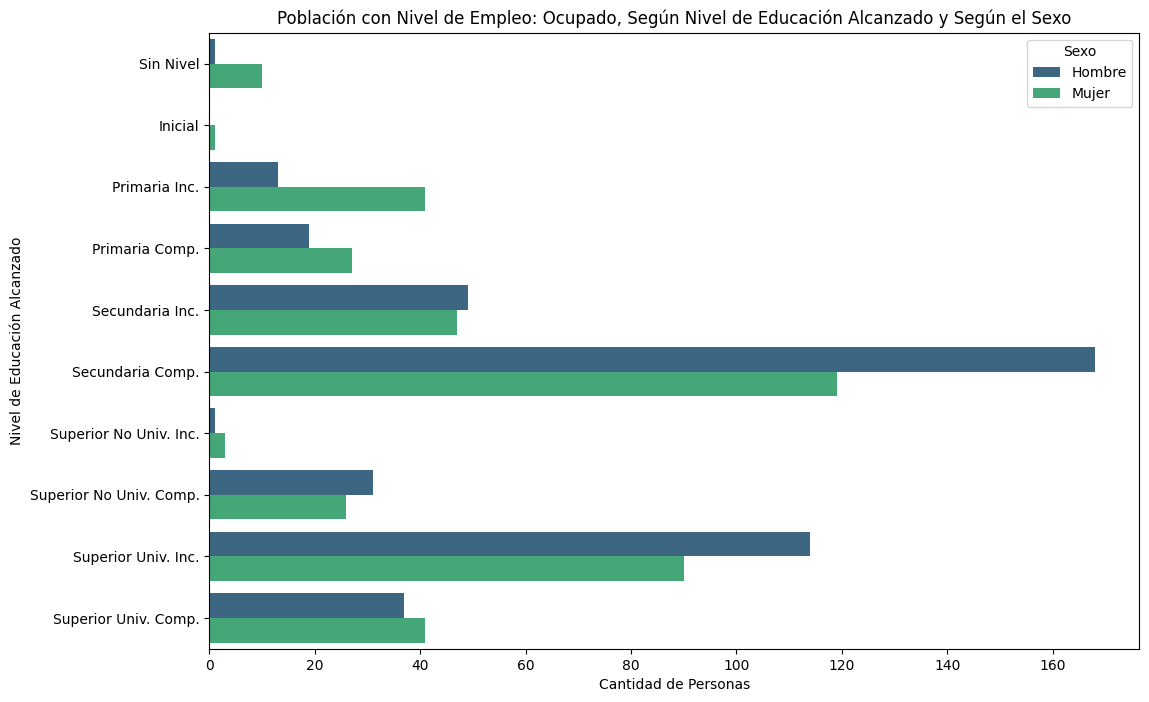

In [ ]:
#Población con Nivel de Empleo: Ocupado, Según Nivel de Educación Alcanzado y Según el Sexo

import seaborn as sns

#personas con nivel de empleo:ocupado
df_activos = combined_df[combined_df['ocu200new'] == 0]

orden_categorias = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#grafiquito para cada nivel de educación y sexo
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='p109a', hue='p107', data=df_activos, order=orden_categorias, palette='viridis')

legend_labels = ['Sin Nivel', 'Inicial', 'Primaria Inc.', 'Primaria Comp.',
                 'Secundaria Inc.', 'Secundaria Comp.',
                 'Superior No Univ. Inc.', 'Superior No Univ. Comp.',
                 'Superior Univ. Inc.', 'Superior Univ. Comp.']
ax.set_yticklabels(legend_labels)

legend_labels1 = ['Hombre', 'Mujer']
ax.legend(title='Sexo', labels=legend_labels1)

plt.xlabel('Cantidad de Personas')
plt.ylabel('Nivel de Educación Alcanzado')
plt.title('Población con Nivel de Empleo: Ocupado, Según Nivel de Educación Alcanzado y Según el Sexo')
plt.show()

In [ ]:
# #Población con Nivel de Empleo: Ocupado, Según Edad y Según el Sexo

# import seaborn as sns

# bins = [14, 25, 60, 65, 100]

# df_activos2 = combined_df[combined_df['ocu200new'] == 0]

# plt.figure(figsize=(12, 8))
# ax = sns.histplot(x='p108', hue='p107', data=df_activos2, bins=bins, multiple='dodge', palette='viridis')

# interval_labels = ['14-24', '25-59', '60-64', '65-100']
# plt.xticks([20, 42.5, 62.5, 82.5], interval_labels)

# #legend_labels1 = ['Hombre', 'Mujer']
# legend_labels1 = ['Mujer', 'Hombre']
# ax.legend(title='Sexo', labels=legend_labels1)

# plt.xlabel('Edad')
# plt.ylabel('Cantidad de Personas')
# plt.title('Población con Nivel de Empleo: Ocupado, Según Edad y Según el Sexo')
# plt.show()

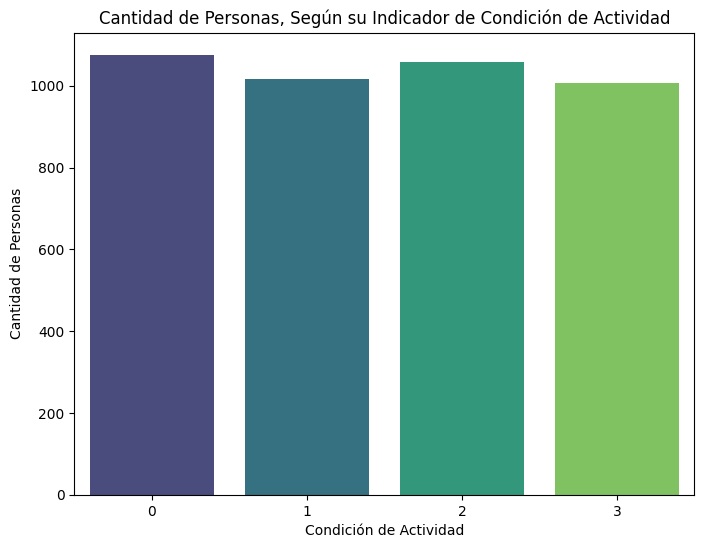

In [ ]:
# Cantidad de Personas, Según su Indicador de Condición de Actividad

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='ocu200new', data=combined_df, palette='viridis')
plt.xlabel('Condición de Actividad')
plt.ylabel('Cantidad de Personas')
plt.title('Cantidad de Personas, Según su Indicador de Condición de Actividad')
plt.show()


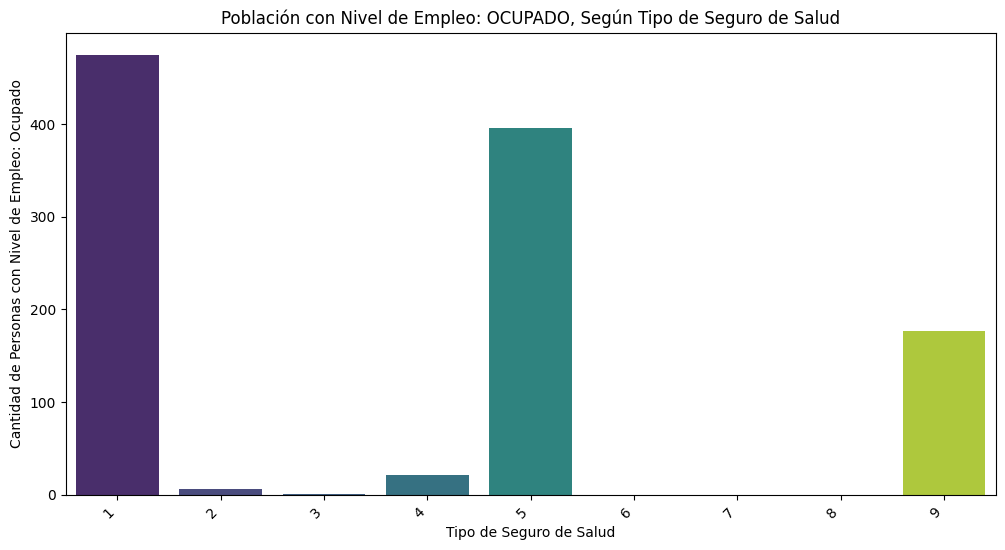

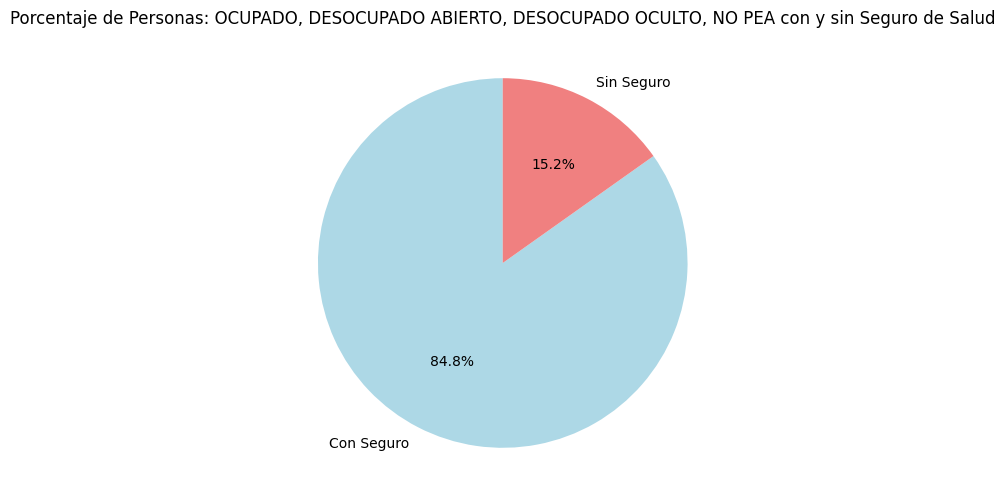

In [ ]:
#Población con Nivel de Empleo: Ocupado, Según Tipo de Seguro de Salud

import seaborn as sns

df_ocupados3 = combined_df[combined_df['ocu200new'] == 0]

etiquetas_p222 = {
    1: 1, #ESSALUD (antes IPSS)
    2: 2, #SEGURO PRIVADO DE SALUD
    3: 3, #ENTIDAD PRESTADORA DE SALUD
    4: 4, #SEGURO DE FF.AA./POLICIALES
    5: 5, #SEGURO UNIVERSAL DE SALUD (SIS)
    6: 6, #SEGURO UNIVERSITARIO
    7: 7, #SEGURO ESCOLAR PRIVADO
    8: 8, #OTRO
    9: 9  #NO TIENE SEGURO
}

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='p222', data=df_ocupados3, order=etiquetas_p222.values(), palette='viridis')

plt.xlabel('Tipo de Seguro de Salud')
plt.ylabel('Cantidad de Personas con Nivel de Empleo: Ocupado')
plt.title('Población con Nivel de Empleo: OCUPADO, Según Tipo de Seguro de Salud')

ax.set_xticklabels(etiquetas_p222.values(), rotation=45, ha='right')
plt.show()

#########################
#Porcentaje de Personas: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA con y sin Seguro de Salud

import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las personas ocupadas (ocu200new=0)
#df_ocupados4 = combined_df[combined_df['ocu200new'] == 0]

# Contar la cantidad de personas con seguro y sin seguro
conteo_con_seguro = combined_df['p222'].isin([1, 2, 3, 4, 5, 6, 7, 8]).sum()
conteo_sin_seguro = len(combined_df) - conteo_con_seguro

# Etiquetas y valores para el gráfico de torta
etiquetas = ['Con Seguro', 'Sin Seguro']
valores = [conteo_con_seguro, conteo_sin_seguro]

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Porcentaje de Personas: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA con y sin Seguro de Salud')
plt.show()

<ipython-input-31-5bd89246415e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocupados['intervalo_edad'] = pd.cut(df_ocupados['p108'], bins=bins, labels=['14-24 años', '25-44 años', '45 años a más'])


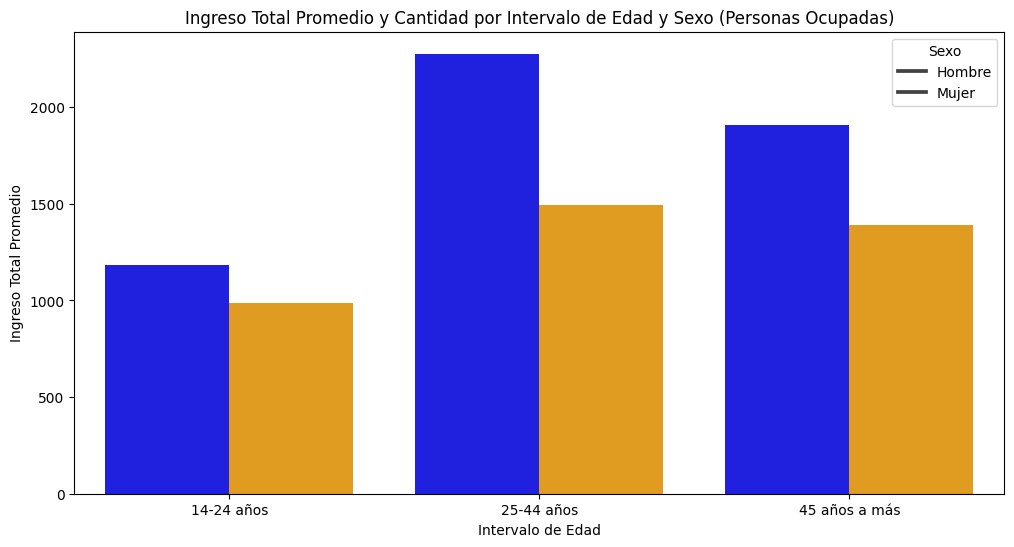

In [ ]:
#INGRESO PROMEDIO PROVENIENTE DEL TRABAJO DE PERSONAS OCUPADAS SEGÚN SEXO Y GRUPOS DE EDAD

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#interv edades
bins = [14, 25, 45, 100]

df_ocupados = combined_df[combined_df['ocu200new'] == 0]

#new colum intervalos edades
df_ocupados['intervalo_edad'] = pd.cut(df_ocupados['p108'], bins=bins, labels=['14-24 años', '25-44 años', '45 años a más'])

#ingreso promedio y la cantidad para cada intervalo de edad y sexo
resultados = df_ocupados.groupby(['intervalo_edad', 'p107'])['ingtot'].agg(['mean', 'count']).reset_index()

colores_sexo = {1: 'blue', 2: 'orange'}
resultados['color'] = resultados['p107'].map(colores_sexo)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='intervalo_edad', y='mean', hue='p107', data=resultados, palette=colores_sexo)

dataresul = []
for i, row in resultados.iterrows():
    #count_label = f'{row["count"]} personas'
    dataresul.append({
        'p107': row['p107'],
        'mean': row['mean'],
    })

plt.xlabel('Intervalo de Edad')
plt.ylabel('Ingreso Total Promedio')
plt.title('Ingreso Total Promedio y Cantidad por Intervalo de Edad y Sexo (Personas Ocupadas)')
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.show()


In [ ]:
import pandas as pd

df_resultados = pd.DataFrame(dataresul)

# Luego, puedes agregar la información de posición y formato al DataFrame
df_resultados['Sexo'] = df_resultados['p107']
df_resultados['Ingreso_Promedio'] = df_resultados['mean'].apply(lambda x: f'{x:.2f}')

# Finalmente, puedes seleccionar las columnas relevantes
tabla_resultados = df_resultados[['Sexo', 'Ingreso_Promedio']]
tabla_resultados

,Sexo,Ingreso_Promedio
0,1,1186.15
1,2,986.19
2,1,2276.93
3,2,1494.74
4,1,1905.55
5,2,1391.53


#**COMPARACIÓN DE MODELOS DE CLASIFICACIÓN (REGRESIÓN LOGÍSTICA, ÁRBOLES DE DECISIÓN, SUPPORT VECTOR MACHINE-SVM, RANDOM FOREST)**
**CLASIFICACIÓN DEL INDICADOR DE CONDICIÓN DE ACTIVIDAD: OCUPADO, DESOCUPADO ABIERTO, DESOCUPADO OCULTO, NO PEA**

**Encuesta Permamente de Empleo del INEI**

---

In [ ]:
r_logistica = accuracy_score(Y_validation1, predictions1)
a_decision = accuracy_score(y_test2, predictions2)
svm = accuracy_score(y_test3, predictions3)
r_forest = accuracy_score(y_test, y_pred)

nombresitos = ["Regresión Logística", "Árboles de Decisión", "Support Machine Vector (SMV)", "Random Forest"]
accuracies = [r_logistica, a_decision, svm, r_forest]

datitaxd = {'MODELO': nombresitos, 'ACCURACY': accuracies}
dfxd = pd.DataFrame(datitaxd)

dfxd

,MODELO,ACCURACY
0,Regresión Logística,0.815266
1,Árboles de Decisión,0.962713
2,Support Machine Vector (SMV),0.517129
3,Random Forest,0.977869
